In [1]:
import numpy as np
import matplotlib.pyplot as plt
import yt
import trident
import chollaread
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.colors as colors
import colorcet as cc
from matplotlib.cm import get_cmap
from astropy.constants import M_sun

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [2]:
ds = chollaread.load('/Users/sofimar/Desktop/Summer Research/140.h5.0',cell_size_cgs=(10/256)*chollaread.kpc)

yt : [INFO     ] 2022-05-09 01:12:15,714 Parameters: current_time              = 0.0
yt : [INFO     ] 2022-05-09 01:12:15,716 Parameters: domain_dimensions         = [512 256 256]
yt : [INFO     ] 2022-05-09 01:12:15,717 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2022-05-09 01:12:15,717 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22]
yt : [INFO     ] 2022-05-09 01:12:15,718 Parameters: cosmological_simulation   = 0.0


In [22]:
def plot(x,y,z):
    # Takes in arrays x,y,z
    # bins them

    # weights by z (for example, for mass-weighting)
    
    # 100 x bins, 101 y bins. The reason I like to keep x and y different is
    # so that the code yells at me when dimensions don't line up
    # which can help avoid subtle mistakes

    # normed=False makes it easier to scale the colorbar appropriate to show whatever units you prefer
    
    hist,xedges,yedges = np.histogram2d(x,y,bins=[70,70],normed=False,weights=z)

    # xedges and yedges are always longer than needed by 1,
    # since N cells have N+1 edges. That's why I truncate xedges[:-1].

    # hist.transpose() is needed to transpose the array. This is one downside of using pcolormesh.

    # norm=matplotlib.colors.LogNorm() normalizes the color in log scale
    
    plt.pcolormesh(xedges[:-1],yedges[:-1],hist.transpose(),norm=colors.LogNorm())
    plt.colorbar()

In [23]:
def make_ray(x0, y0, z0, x, y, z):
    
    k = (3.086E+21)*10 # Code length
    
    ray_start = np.array([x0,y0,z0])*k
    ray_end = np.array([x,y,z])*k
    
    ray = trident.make_simple_ray(ds,
                                 start_position=ray_start,
                                 end_position=ray_end,
                                 data_filename= 'ray_.h5',
                                 lines='all',
                                 ftype='gas')
    return ray

In [24]:
ray1 = make_ray(0.94,0,0.5,0.94,1,0.5)

yt : [INFO     ] 2022-05-09 01:28:46,125 Getting segment at z = 0.0: [0.47 0.   0.25] unitary to [0.47 0.5  0.25] unitary.
yt : [INFO     ] 2022-05-09 01:28:46,127 Getting subsegment: [0.47 unitary, 0.0 unitary, 0.25 unitary] to [0.47 unitary, 0.5 unitary, 0.25 unitary].
yt : [INFO     ] 2022-05-09 01:28:46,647 Saving field data to yt dataset: ray_.h5.
yt : [INFO     ] 2022-05-09 01:28:46,721 Parameters: current_time              = 0.0 code_time
yt : [INFO     ] 2022-05-09 01:28:46,721 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2022-05-09 01:28:46,722 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2022-05-09 01:28:46,722 Parameters: domain_right_edge         = [6.172e+22 3.086e+22 3.086e+22] code_length
yt : [INFO     ] 2022-05-09 01:28:46,723 Parameters: cosmological_simulation   = 0.0


In [6]:
trident.add_ion_fields(ray1, ions=['H I', 'H II'], ftype="gas", particle_type=False)

/Users/sofimar/opt/anaconda3/envs/yt_st/lib/python3.9/site-packages/trident/ion_balance.py:292: UserWarning: The "particle_type" keyword is deprecated. Please use "sampling_type" instead.
  _determine_sampling_type(ds, sampling_type, particle_type)
yt : [INFO     ] 2022-05-09 01:13:51,067 Allocating for 2.560e+02 particles (index particle type 'all')
yt : [INFO     ] 2022-05-09 01:13:51,071 Identified 1.210e+02 octs


In [20]:
HI_den = np.array(ray1.all_data()['H_p0_density'])
temp = np.log10(np.array(ray1.all_data()['temperature']))
den = np.log10(np.array(ray1.all_data()['density']))

<ipython-input-22-a5128036cb67>:22: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xedges[:-1],yedges[:-1],hist.transpose(),norm=colors.LogNorm())


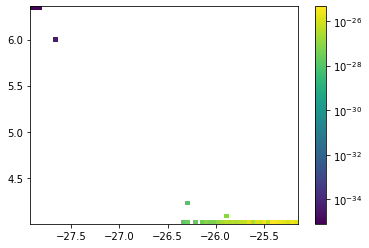

In [25]:
plot(den,temp,HI_den)

In [9]:
temp

array([6.3932619 , 6.39295034, 6.39250493, 6.39212585, 6.39196199,
       6.39186997, 6.3918424 , 6.39188339, 6.39206465, 6.39220611,
       6.39221903, 6.39219303, 6.39210531, 6.39181296, 6.39133566,
       6.39075703, 6.39037747, 6.39006312, 6.38971024, 6.38936842,
       6.38912996, 6.38884285, 6.3884203 , 6.38790175, 6.38746609,
       6.38711265, 6.38680765, 6.38663783, 6.38661558, 6.3866803 ,
       6.3867874 , 6.3870292 , 6.38730449, 6.3877328 , 6.38789623,
       6.38798136, 6.38793202, 6.38767254, 6.38726221, 6.38680167,
       6.38636238, 6.38585119, 6.38549318, 6.38526942, 6.38515965,
       6.3850888 , 6.38504205, 6.38495793, 6.38468898, 6.38406073,
       6.38322399, 6.38263115, 6.38272177, 6.38324195, 6.38443955,
       6.38596824, 6.38737282, 6.38805667, 6.38823131, 6.38806166,
       6.38769735, 6.38729956, 6.3868295 , 6.38628056, 6.38547836,
       6.3846189 , 6.38400254, 6.38375976, 6.38388805, 6.38420377,
       6.38469632, 6.38487412, 6.38458333, 6.38437298, 6.38446

In [10]:
den

array([-27.75896166, -27.75942577, -27.76008575, -27.76064497,
       -27.7608774 , -27.76099601, -27.76102897, -27.76095991,
       -27.76067664, -27.760454  , -27.76042455, -27.76046011,
       -27.76058718, -27.7609882 , -27.76161212, -27.76236081,
       -27.76287125, -27.76331883, -27.76385131, -27.76436556,
       -27.76472402, -27.76515219, -27.76578414, -27.7665603 ,
       -27.76721051, -27.76773569, -27.76818548, -27.76842993,
       -27.76846375, -27.76837337, -27.7682202 , -27.76786751,
       -27.76745326, -27.7668032 , -27.76654979, -27.76641618,
       -27.76648614, -27.76687015, -27.76748184, -27.76817248,
       -27.76882752, -27.76959321, -27.77013027, -27.77046568,
       -27.77063205, -27.77073781, -27.77080861, -27.77093462,
       -27.77133773, -27.77227635, -27.77352617, -27.77441241,
       -27.77427361, -27.77348756, -27.77168443, -27.76937886,
       -27.76726813, -27.7662392 , -27.76597789, -27.76623369,
       -27.76678582, -27.76739223, -27.76810775, -27.76

In [11]:
HI_den

array([1.07285031e-35, 1.07238745e-35, 1.07173481e-35, 1.07118583e-35,
       1.07097171e-35, 1.07088110e-35, 1.07086037e-35, 1.07094106e-35,
       1.07124293e-35, 1.07148247e-35, 1.07152703e-35, 1.07149634e-35,
       1.07137511e-35, 1.07102706e-35, 1.07053558e-35, 1.06995914e-35,
       1.06953321e-35, 1.06911895e-35, 1.06857962e-35, 1.06806127e-35,
       1.06770051e-35, 1.06727479e-35, 1.06664413e-35, 1.06586912e-35,
       1.06522305e-35, 1.06470497e-35, 1.06426648e-35, 1.06403725e-35,
       1.06400274e-35, 1.06408326e-35, 1.06422540e-35, 1.06456334e-35,
       1.06497965e-35, 1.06564142e-35, 1.06590731e-35, 1.06604982e-35,
       1.06598572e-35, 1.06560887e-35, 1.06500230e-35, 1.06431178e-35,
       1.06366275e-35, 1.06289954e-35, 1.06236331e-35, 1.06202897e-35,
       1.06186047e-35, 1.06175574e-35, 1.06168412e-35, 1.06155871e-35,
       1.06115722e-35, 1.06022742e-35, 1.05899103e-35, 1.05811412e-35,
       1.05825630e-35, 1.05904650e-35, 1.06085187e-35, 1.06317055e-35,
      